In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [2]:
pip install --upgrade matplotlib

     |████████████████████████████████| 7.2 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
ERROR: Could not install packages due to an OSError: Cannot move the non-empty directory '/usr/local/lib/python3.9/site-packages/matplotlib-3.3.4.dist-info/': Lacking write permission to '/usr/local/lib/python3.9/site-packages/matplotlib-3.3.4.dist-info/'.

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
p = np.array([1,1,1])

In [4]:
r  = R.from_euler("z",90, degrees=True)
pr=r.apply(p)
pr

array([-1.,  1.,  1.])

Text(0.5, 0, '$x_3$ (z)')

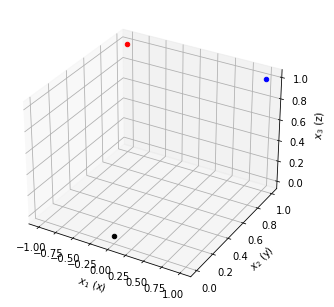

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
# ax = Axes3D(fig,)
# fig.add_axes(ax)
ax.scatter(0,0,0,color="k")
ax.scatter(p[0],p[1],p[2],color="b")
ax.scatter(pr[0],pr[1],pr[2],color="r")

ax.set_xlabel('$x_1$ (x)')
ax.set_ylabel('$x_2$ (y)')
ax.set_zlabel('$x_3$ (z)')

In [11]:
r.as_matrix().round(2)

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [12]:
r = R.from_euler('zyx', [180, 0, 0], degrees=True)
r.as_matrix().round(3)

array([[-1., -0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [13]:
r.magnitude()

3.141592653589793

In [14]:
r = R.from_euler('zyx', [90, 45, 30], degrees=True)
r.as_matrix().round(3)

array([[ 0.   , -0.707,  0.707],
       [ 0.866, -0.354, -0.354],
       [ 0.5  ,  0.612,  0.612]])

In [15]:
r = R.from_euler('yxz', [ 45, 30,90], degrees=True)
r.as_matrix().round(3)

array([[-0.354, -0.866,  0.354],
       [ 0.707, -0.   ,  0.707],
       [-0.612,  0.5  ,  0.612]])

In [18]:


def rotate_point(elev,azim,angle=0,axis="x"):
    p = np.array([0,1,1])
    r  = R.from_euler(axis,angle, degrees=True)
#     pr = r.as_matrix().dot(p)
    vx = np.array([1,0,0])
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    fig.add_axes(ax)
    ax.quiver3D([0],[0],[0],[1],[0],[0] ,color="green",label="x")
    ax.quiver3D([0],[0],[0],[-1],[0],[0],color='g', linestyle="dashed")
    ax.quiver3D([0],[0],[0],[0],[1],[0],color="blue",label="y")
    ax.quiver3D([0],[0],[0],[0],[-1],[0],color="blue",linestyle="dashed")
    ax.quiver3D([0],[0],[0],[0],[0],[1],color="red",label="z")
    ax.quiver3D([0],[0],[0],[0],[0],[-1],color="red",linestyle="dashed")
    
    ax.scatter(p[0],p[1],p[2],color='b')
    ax.scatter(pr[0],pr[1],pr[2],color='r')
    
    ax.quiver3D(0,0,0,pr[0],pr[1],pr[2] ,color="k")
#     ax.set_aspect('auto')

    ax.set_xlabel('$x_1$ (x)')
    ax.set_ylabel('$x_2$ (y)')
    ax.set_zlabel('$x_3$ (z)')

    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    ax.legend()
    ax.view_init(elev,azim)



In [19]:
interact(rotate_point,
         elev=widgets.IntSlider(min=-90,max=180,step=10,value=30),
         azim=widgets.IntSlider(min=-90,max=90,step=10,value=30),
         angle=widgets.IntSlider(min=0,max=360,step=10,value=0),
         axis=["x","y","z"])

interactive(children=(IntSlider(value=30, description='elev', max=180, min=-90, step=10), IntSlider(value=30, …

<function __main__.rotate_point(elev, azim, angle=0, axis='x')>